# Arbol

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn import tree

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano

Loaded Datasets
reemplazarNulls
reemplazarCategoricas


### Codigo a correr

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [4]:
runSimple = True
runValidated = True
runDouble = True

**Save :** Guardar Modelo (pisa anterior)

In [5]:
saveSimple = True
saveValidated = True
saveDouble = True

### Dataset

In [6]:
df_feat = pd.read_csv("datasets/train_features.csv", low_memory=False)
df_targ = targetBooleano( pd.read_csv("datasets/train_target.csv") )

### Preprocesamiento

In [7]:
reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)

,id,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,...,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,y,m,d
0,74816,247.5,225.0,0.0,78.0,74.0,True,4.0,68.0,7.0,...,48.0,17.9,11.6,17.2,14.8,26.0,17.0,2014,6,7
1,64318,202.5,0.0,0.0,14.0,56.0,True,4.0,5.8,1.0,...,61.0,41.8,22.0,40.2,28.1,31.0,11.0,2014,12,7
2,54357,90.0,90.0,2.6,79.0,47.0,False,4.0,0.0,8.0,...,57.0,19.0,3.1,15.9,13.7,33.0,19.0,2010,7,8
3,1762,337.5,247.5,0.0,92.0,96.0,True,3.0,5.0,8.0,...,54.0,21.5,19.3,19.2,19.4,31.0,13.0,2015,11,4
4,89422,45.0,22.5,0.0,14.0,37.0,False,4.0,0.0,2.0,...,50.0,35.7,18.4,34.8,26.9,19.0,13.0,2014,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102351,49272,157.5,90.0,6.5,63.0,44.0,False,3.8,0.4,6.0,...,72.0,20.5,9.6,13.8,14.6,37.0,20.0,2012,5,23
102352,13885,270.0,315.0,2.1,65.0,80.0,True,1.6,5.2,7.0,...,48.0,15.4,8.9,14.3,11.8,31.0,30.0,2011,10,25
102353,4586,247.5,337.5,0.0,81.0,62.0,False,4.0,0.0,7.0,...,35.0,17.9,9.6,15.3,14.6,2.0,6.0,2015,12,16
102354,68030,45.0,67.5,0.9,79.0,65.0,False,2.2,0.0,8.0,...,56.0,12.8,5.9,9.8,9.6,24.0,17.0,2010,8,18


In [8]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102356 entries, 0 to 102355
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            102356 non-null  int64  
 1   direccion_viento_tarde        102356 non-null  float64
 2   direccion_viento_temprano     102356 non-null  float64
 3   horas_de_sol                  102356 non-null  float64
 4   humedad_tarde                 102356 non-null  float64
 5   humedad_temprano              102356 non-null  float64
 6   llovieron_hamburguesas_hoy    102356 non-null  bool   
 7   mm_evaporados_agua            102356 non-null  float64
 8   mm_lluvia_dia                 102356 non-null  float64
 9   nubosidad_tarde               102356 non-null  float64
 10  nubosidad_temprano            102356 non-null  float64
 11  presion_atmosferica_tarde     102356 non-null  float64
 12  presion_atmosferica_temprano  102356 non-nul

## Entrenamiento

### Simple

In [10]:
if (runSimple):
    arbol_simple = DecisionTreeClassifier(
        random_state=1,
        max_depth=3,
        min_samples_split=200
    )
    arbol_simple.fit( df_feat, df_targ )
    # Guardar
else:
    #Cargar
    print('TODO')

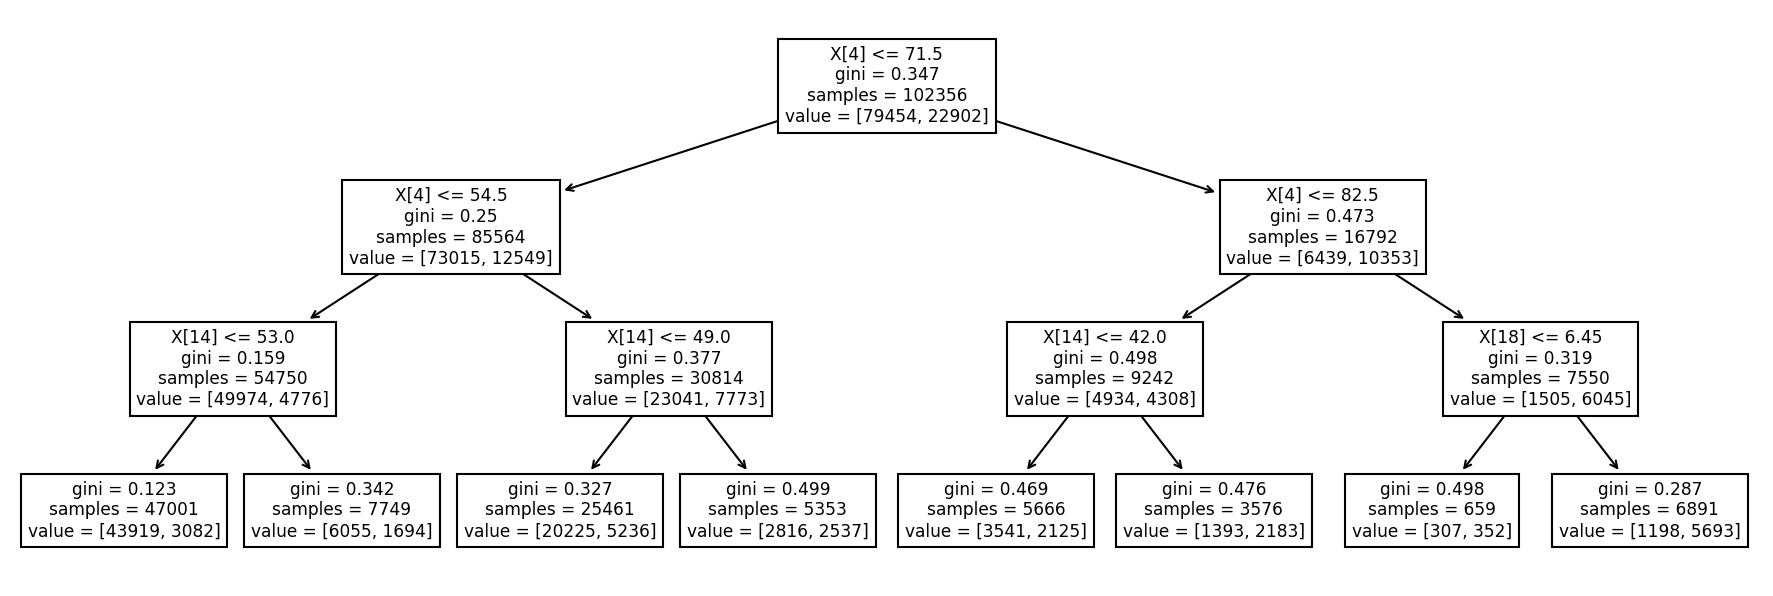

In [11]:
plt.figure(dpi=150,figsize=(15, 5))
tree.plot_tree(arbol_simple);

In [12]:
pred = arbol_simple.predict(df_feat)

In [13]:
accuracy_score(df_targ, pred)

0.8283246707569659

### Validado

In [14]:
arbol = DecisionTreeClassifier(random_state=1)
params = {'max_depth': np.arange(1, 20), 'min_samples_leaf': np.arange(50, 1000)}

In [ ]:
gridSearch = GridSearchCV(
    arbol,
    params,
    scoring='accuracy',
    n_jobs=5,
    return_train_score=True,
    verbose=1
).fit(df_feat, df_targ)

In [ ]:
print(f"Best score: {gridSearch.best_score_}")
print(f"Best params {gridSearch.best_params_}")